In [2]:
%matplotlib inline


In [3]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

E:\Anaconda\envs\2022 AI\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda\envs\2022 AI\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda\envs\2022 AI\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda\envs\2022 AI\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [4]:
IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


In [5]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

In [6]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
# encode wine type labels
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[0:5], train_labels_enc[0:5])

['cat', 'cat', 'cat', 'cat', 'cat'] [0 0 0 0 0]


In [7]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Model
import tensorflow.keras

vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output = tensorflow.keras.layers.Flatten()(output)

vgg_model = Model(vgg.input, output)
vgg_model.trainable = False

for layer in vgg_model.layers:
    layer.trainable = False

vgg_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
bloc

In [8]:
import pandas as pd
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

E:\Anaconda\envs\2022 AI\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


Layer Type  \
0   <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x00000236804CE1C8>   
1   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000236BABAF988>     
2   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002373F2C59C8>     
3   <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000023680619D48>     
4   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002368063F508>     
5   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000023680670848>     
6   <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000023680699608>     
7   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000236806C9848>     
8   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000236806D6648>     
9   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000236806F4B88>     
10  <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000002368072E648>     
11  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002368073C348>     
12  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002368076B648>     
13  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000023680788E88>     
14  <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x00000236807C3608>     
15  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000236807D0308>     
16  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000236807FF588>     
17  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000023680818708>     
18  <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000023680855548>     
19  <tensorflow.python.keras.layers.core.Flatten object at 0x00000236808A1888>             

      Layer Name  Layer Trainable  
0   input_1       False            
1   block1_conv1  False            
2   block1_conv2  False            
3   block1_pool   False            
4   block2_conv1  False            
5   block2_conv2  False            
6   block2_pool   False            
7   block3_conv1  False            
8   block3_conv2  False            
9   block3_conv3  False            
10  block3_pool   False            
11  block4_conv1  False            
12  block4_conv2  False            
13  block4_conv3  False            
14  block4_pool   False            
15  block5_conv1  False            
16  block5_conv2  False            
17  block5_conv3  False            
18  block5_pool   False            
19  flatten       False

In [9]:
print("Trainable layers:", vgg_model.trainable_weights)

Trainable layers: []


(1, 4, 4, 512)


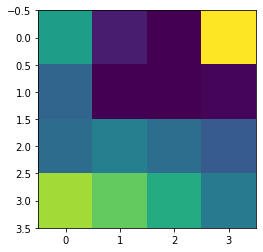

In [10]:
bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)
plt.imshow(bottleneck_feature_example[0][:,:,0])

In [11]:
def get_bottleneck_features(model, input_imgs):
    
    features = model.predict(input_imgs, verbose=0)
    return features

In [12]:
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
validation_features_vgg = get_bottleneck_features(vgg_model, validation_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', validation_features_vgg.shape)

Train Bottleneck Features: (3000, 8192) 	Validation Bottleneck Features: (1000, 8192)


In [13]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = model.fit(x=train_features_vgg, y=train_labels_enc,
                    validation_data=(validation_features_vgg, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Train on 3000 samples, validate on 1000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
3000/3000 [==============================] - 1s 420us/sample - loss: 0.4362 - acc: 0.7897 - val_loss: 0.2801 - val_acc: 0.8850
Epoch 2/30
3000/3000 [==============================] - 1s 170us/sample - loss

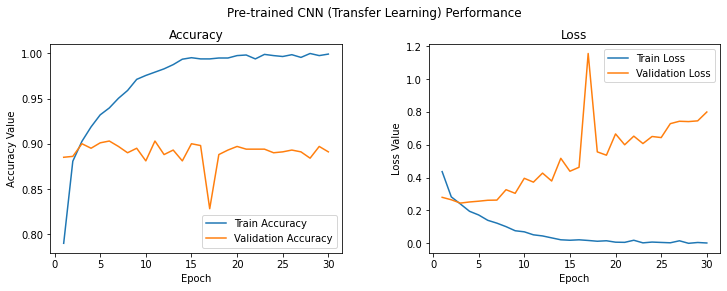

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [16]:
model.save('cats_dogs_tlearn_basic_cnn.h5')

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [18]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 8192)              14714688  
_________________________________________________________________
dense_3 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 513       
Total params: 19,172,673
Trainable params: 4,457,985
Non-trainable params: 14,714,688
________________________________________________________

In [19]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/100
100/100 [==============================] - 17s 173ms/step - loss: 0.6500 - acc: 0.6200 - val_loss: 0.4914 - val_acc: 0.8240
Epoch 2/100
100/100 [==============================] - 12s 125ms/step - loss: 0.5645 - acc: 0.7150 - val_loss: 0.4030 - val_acc: 0.8500
Epoch 3/100
100/100 [==============================] - 13s 129ms/step - loss: 0.5007 - acc: 0.7583 - val_loss: 0.3536 - val_acc: 0.8550
Epoch 4/100
100/100 [==============================] - 14s 136ms/step - loss: 0.4854 - acc: 0.7690 - val_loss: 0.3411 - val_acc: 0.8560
Epoch 5/100
100/100 [==============================] - 12s 124ms/step - loss: 0.4576 - acc: 0.7837 - val_loss: 0.3111 - val_acc: 0.8660
Epoch 6/100
100/100 [==============================] - 13s 127ms/step - loss: 0.4337 - acc: 0.8023 - val_loss: 0.3038 - val_acc: 0.8680
Epoch 7/100
100/100 [==============================] - 13s 129ms/step - loss: 0.4194 - acc: 0.8007 - val_loss: 0.2887 - val_acc: 0.8720
Epoch 8/100
100/100 [===========================

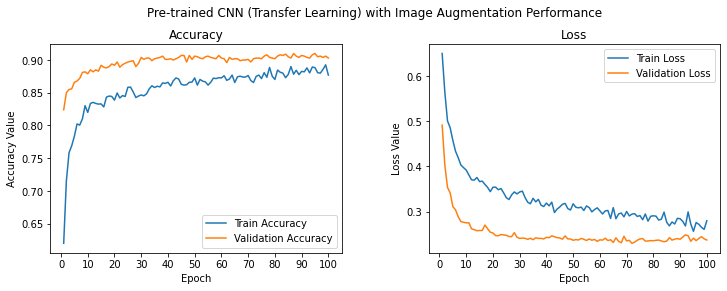

In [20]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) with Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [21]:
model.save('cats_dogs_tlearn_img_aug_cnn.h5')

In [22]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
print("Trainable layers:", vgg_model.trainable_weights)

Trainable layers: [<tf.Variable 'block4_conv1/kernel:0' shape=(3, 3, 256, 512) dtype=float32>, <tf.Variable 'block4_conv1/bias:0' shape=(512,) dtype=float32>, <tf.Variable 'block4_conv2/kernel:0' shape=(3, 3, 512, 512) dtype=float32>, <tf.Variable 'block4_conv2/bias:0' shape=(512,) dtype=float32>, <tf.Variable 'block4_conv3/kernel:0' shape=(3, 3, 512, 512) dtype=float32>, <tf.Variable 'block4_conv3/bias:0' shape=(512,) dtype=float32>, <tf.Variable 'block5_conv1/kernel:0' shape=(3, 3, 512, 512) dtype=float32>, <tf.Variable 'block5_conv1/bias:0' shape=(512,) dtype=float32>, <tf.Variable 'block5_conv2/kernel:0' shape=(3, 3, 512, 512) dtype=float32>, <tf.Variable 'block5_conv2/bias:0' shape=(512,) dtype=float32>, <tf.Variable 'block5_conv3/kernel:0' shape=(3, 3, 512, 512) dtype=float32>, <tf.Variable 'block5_conv3/bias:0' shape=(512,) dtype=float32>]


In [23]:
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

Layer Type  \
0   <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x00000236804CE1C8>   
1   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000236BABAF988>     
2   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002373F2C59C8>     
3   <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000023680619D48>     
4   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002368063F508>     
5   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000023680670848>     
6   <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000023680699608>     
7   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000236806C9848>     
8   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000236806D6648>     
9   <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000236806F4B88>     
10  <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x000002368072E648>     
11  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002368073C348>     
12  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x000002368076B648>     
13  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000023680788E88>     
14  <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x00000236807C3608>     
15  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000236807D0308>     
16  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x00000236807FF588>     
17  <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000023680818708>     
18  <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000023680855548>     
19  <tensorflow.python.keras.layers.core.Flatten object at 0x00000236808A1888>             

      Layer Name  Layer Trainable  
0   input_1       False            
1   block1_conv1  False            
2   block1_conv2  False            
3   block1_pool   False            
4   block2_conv1  False            
5   block2_conv2  False            
6   block2_pool   False            
7   block3_conv1  False            
8   block3_conv2  False            
9   block3_conv3  False            
10  block3_pool   False            
11  block4_conv1  True             
12  block4_conv2  True             
13  block4_conv3  True             
14  block4_pool   True             
15  block5_conv1  True             
16  block5_conv2  True             
17  block5_conv3  True             
18  block5_pool   True             
19  flatten       True

In [24]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)

In [25]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

model = Sequential()
model.add(vgg_model)
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 8192)              14714688  
_________________________________________________________________
dense_6 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 19,172,673
Trainable params: 17,437,185
Non-trainable params: 1,735,488
________________________________________________________

In [26]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Epoch 1/100
100/100 [==============================] - 15s 152ms/step - loss: 0.5958 - acc: 0.6653 - val_loss: 0.3066 - val_acc: 0.8910
Epoch 2/100
100/100 [==============================] - 14s 139ms/step - loss: 0.3940 - acc: 0.8287 - val_loss: 0.3093 - val_acc: 0.8770
Epoch 3/100
100/100 [==============================] - 13s 131ms/step - loss: 0.3083 - acc: 0.8660 - val_loss: 0.2098 - val_acc: 0.9140
Epoch 4/100
100/100 [==============================] - 13s 125ms/step - loss: 0.2849 - acc: 0.8857 - val_loss: 0.1649 - val_acc: 0.9350
Epoch 5/100
100/100 [==============================] - 12s 124ms/step - loss: 0.2501 - acc: 0.8943 - val_loss: 0.1576 - val_acc: 0.9420
Epoch 6/100
100/100 [==============================] - 13s 125ms/step - loss: 0.2162 - acc: 0.9137 - val_loss: 0.1656 - val_acc: 0.9310
Epoch 7/100
100/100 [==============================] - 12s 125ms/step - loss: 0.2278 - acc: 0.9083 - val_loss: 0.1426 - val_acc: 0.9440
Epoch 8/100
100/100 [===========================

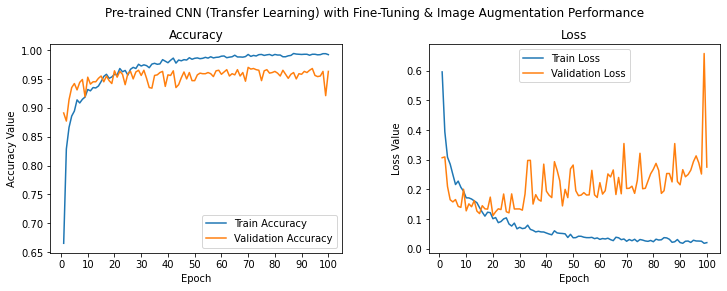

In [27]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Pre-trained CNN (Transfer Learning) with Fine-Tuning & Image Augmentation Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['acc'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_acc'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 101, 10))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 10))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [28]:
model.save('cats_dogs_tlearn_finetune_img_aug_cnn.h5')